In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from mpclab_common.track import get_track

Track length: 17.46 m
Track width: 1.1 m
Global coordinates: (3.5, 1.0, 1.5707963267948966) -> Local coordinates: (3.9213182688583563, -0.10577550639754563, 0.12149631043189779)
Local coordinates: (10.0, 0.2, 0) -> Global coordinates: (-0.5265761774930522, 4.433782896394624, 2.771626907773074)
Global coordinates: (0.0, 1.4, 0) -> Local coordinates: None


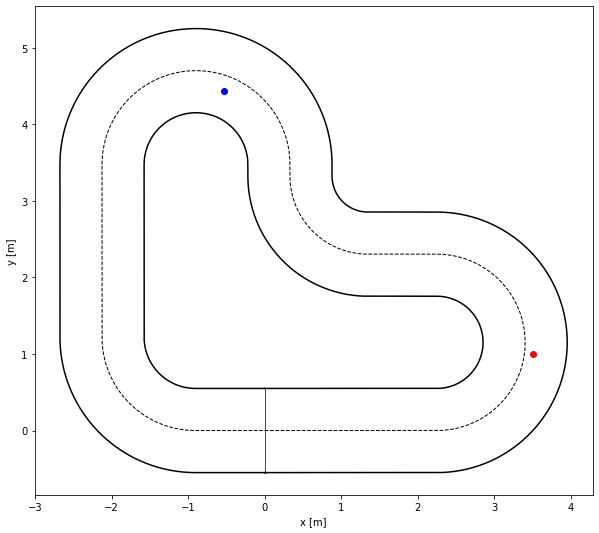

In [5]:
# Load the track object
track = get_track('L_track_barc')

print(f'Track length: {track.track_length:.2f} m')
print(f'Track width: {track.track_width} m')

# Plot visual representation of track
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
track.plot_map(ax)
ax.set_aspect('equal')
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')

# Convert between global (x, y, heading) and local (s, e_y, e_psi) coordinates
global_coord = (3.5, 1.0, np.pi/2)
local_coord = track.global_to_local(global_coord)
print('Global coordinates: ' + str(global_coord) + ' -> Local coordinates: ' + str(local_coord))
ax.plot(global_coord[0], global_coord[1], 'ro')

local_coord = (10.0, 0.2, 0)
global_coord = track.local_to_global(local_coord)
print('Local coordinates: ' + str(local_coord) + ' -> Global coordinates: ' + str(global_coord))
ax.plot(global_coord[0], global_coord[1], 'bo')

# Outside track boundaries
global_coord = (0.0, 1.4, 0)
local_coord = track.global_to_local(global_coord)
print('Global coordinates: ' + str(global_coord) + ' -> Local coordinates: ' + str(local_coord))

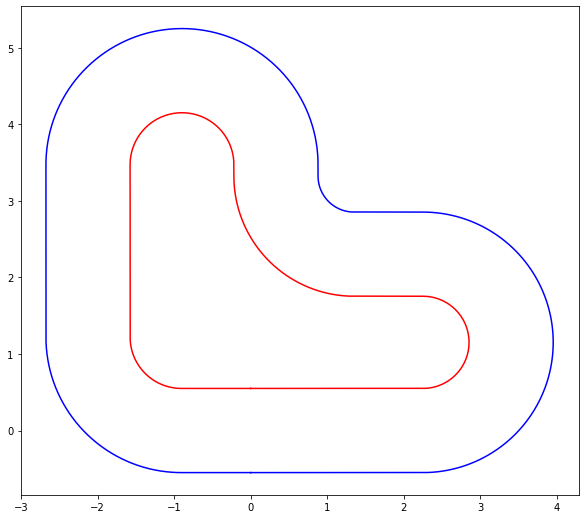

In [4]:
# Example for obtaining the x-y points of the track boundaries
track_xy = track.get_track_xy()
bound_in_xy = track_xy['bound_in']
bound_out_xy = track_xy['bound_out'] 

# Convert x-y points to frenet frame
bound_in_sey = []
for _x, _y in zip(bound_in_xy['x'], bound_in_xy['y']):
    _s, _ey, _, = track.global_to_local((_x, _y, 0))
    bound_in_sey.append([_s, _ey])

bound_out_sey = []
for _x, _y in zip(bound_out_xy['x'], bound_out_xy['y']):
    _s, _ey, _, = track.global_to_local((_x, _y, 0))
    bound_out_sey.append([_s, _ey])

# Plot the boundaries of the track
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
ax.plot(bound_in_xy['x'], bound_in_xy['y'], 'r')
ax.plot(bound_out_xy['x'], bound_out_xy['y'], 'b')
ax.set_aspect('equal')